In [1]:
# Structural Design supported by Machine Learning
# Original code developed by Vahid Moosavi (sevamoo@gmail.com) and adapted by Pierluigi D'Acunto (pierluigi.dacunto@tum.de)

#If you use the scripts please reference the official GitHub repository:
#@Misc{sdml2021,
#author = {D'Acunto, Pierluigi and Ohbrock, Patrick Ole and Saldana Ochoa, Karla and Moosavi, Vahid},
#title = {{SDML: Structural Design supported by Machine Learning}},
#year = {2021},
#url = {https://github.com/pierluigidacunto/SDML},
#}

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import glob
import scipy
import sompylib.sompy as SOM
import math
from time import time
import random
import pathlib
import matplotlib.pyplot as plt

In [3]:
path = str(pathlib.Path().absolute())

In [5]:
# Read CSV file and create DataFrame

data = pd.read_csv(path + "\\CEM\\Data\\240731_data_00_CEM.csv", header=None)
data.head(10)  # show first 10 entries of DataFrame

0         1         2         3         4          5         6     
0   8.077384 -1.483768  0.946451  0.087055 -0.046792 -24.490468 -1.892172  \
1   8.306830 -1.880348  0.867704 -0.186034  0.093462 -21.264618 -0.992790   
2  14.096092 -1.965273  0.932630 -0.045055 -0.003976 -21.781726 -3.539213   
3  13.020094 -1.621191  0.853577 -0.106472  0.164157 -24.876871 -2.687368   
4  10.060172 -1.706157  0.938310 -0.038378  0.105514 -21.733360 -3.214786   
5  13.562595 -1.315473  0.896354 -0.150558  0.094052 -17.625194 -1.553846   
6  10.533461 -1.903506  0.860166 -0.001792 -0.025741 -15.594518 -2.859003   
7   4.147654 -1.320200  0.882980  0.010920 -0.009410 -16.061327 -0.304551   
8  14.818685 -1.310272  0.915703 -0.168175 -0.096653 -18.755528 -3.403056   
9   7.546667 -1.842178  0.886074 -0.162429 -0.086158 -16.145124 -0.678556   

         7         8          9    ...        498        499       500   
0  11.983483  7.536289   9.475881  ...   8.077384   8.077384 -1.483768  \
1  10.126048  3.870423   0.317566  ...   8.306830   8.306830 -1.880348   
2  10.590862  2.151903  19.808804  ...  14.096092  14.096092 -1.965273   
3  11.589834  3.402278  11.660791  ...  13.020094  13.020094 -1.621191   
4  14.779617  2.881240   2.989518  ...  10.060172  10.060172 -1.706157   
5   9.559142  5.281622  14.126488  ...  13.562595  13.562595 -1.315473   
6  11.267516  2.545920  16.121302  ...  10.533461  10.533461 -1.903506   
7  12.205192  5.202817  13.820110  ...   4.147654   4.147654 -1.320200   
8   8.309067  8.034260   9.468593  ...  14.818685  14.818685 -1.310272   
9  12.955597  6.497282   9.647367  ...   7.546667   7.546667 -1.842178   

        501       502       503       504       505           506        507  
0 -1.483768  0.087055  0.087055  0.087055  0.087055  12023.150389  15.209451  
1 -1.880348 -0.186034 -0.186034 -0.186034 -0.186034   8563.532166  28.698981  
2 -1.965273 -0.045055 -0.045055 -0.045055 -0.045055  15272.054004  13.756443  
3 -1.621191 -0.106472 -0.106472 -0.106472 -0.106472  12000.837561  33.077083  
4 -1.706157 -0.038378 -0.038378 -0.038378 -0.038378  10115.428181  14.265361  
5 -1.315473 -0.150558 -0.150558 -0.150558 -0.150558  12516.309190  31.836185  
6 -1.903506 -0.001792 -0.001792 -0.001792 -0.001792  11304.165958  27.217573  
7 -1.320200  0.010920  0.010920  0.010920  0.010920  10165.756470  31.825542  
8 -1.310272 -0.168175 -0.168175 -0.168175 -0.168175  12042.158157  29.398032  
9 -1.842178 -0.162429 -0.162429 -0.162429 -0.162429   9625.147588  26.440149  

[10 rows x 508 columns]

In [6]:
# Get general DataFrame info
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Columns: 508 entries, 0 to 507
dtypes: float64(504), int64(4)
memory usage: 15.2 MB


In [7]:
# Get DataFrame size
data.shape

(3925, 508)

In [8]:
# DESCRIPTION -> VARIABLE NAME (DIMENSION) SOURCE

# deviation force at main cable midspan -> cable_center_deviation_force (1) input
# deviation force at deck midspan -> deck_center_deviation_force (1) input
# force in hangars -> hangar_force (1) input
# force in deviations inside deck -> deck_deviation_force (1) input
# force in deviations between main cables -> cable_deviation_force (1) input
# force in support towers -> tower_force (1) input
# force in brace between support towers -> tower_brace_force (1) input
# rise of the deck -> deck_rise (1) input
# vertical distance between the deck and main cables at midspan -> cable_deck_midspan_distance (1) input
# offset of tower base location in x direction/perpendicular to the river -> tower_base_x_offset (1) input
# offset of tower base location in y direction/parallel -> tower_base_y_offset (1) input
# offset of origin nodes at midspan to create a twist in the bridge -> twist_offset (1) input
# number of nodes -> nN (1) output
# number of trail edges -> nT (1) output
# number of deviation edges -> nD (1) output
# load X -> loadX (1) input
# load Y -> loadY (1) input
# load Z -> loadZ (1) input
# nodes position X -> posX (nN) output
# nodes position Y -> posX (nN) output
# nodes position Z -> posX (nN) output
# trail lenghts -> traLen (nT) output
# trail magnitudes -> traMag (nT) output
# deviation lenghts -> devLen (nD) output
# deviation magnitudes -> devMag (nD) input
# total load path -> load_path (1) output
# highest inclination of the deck in degrees -> maximum deck inclination (1) output

In [9]:
# Extract constants

nN = int(data.iloc[0][12])     # number of nodes
nT = int(data.iloc[0][13])    # number of trail edges
nD = int(data.iloc[0][14])    # number of deviation edges

In [10]:
nN

76

In [11]:
# Generate labels for columns in DataFrame

label_columns_fix = ["cable_center_deviation_force", "deck_center_deviation_force", "hangar_force", "deck_deviation_force",
                     "cable_deviation_force", "tower_force", "tower_brace_force", "deck_rise", "cable_deck_midspan_distance",
                     "tower_base_x_offset", "tower_base_y_offset", "twist_offset", "nN", "nT", "nD", "loadX", "loadY", "loadZ"]
label_columns_fix_end = ["load_path", "maximum_deck_inclination"]

nX = len(label_columns_fix)    # number of fixed entries]

label_columns = label_columns_fix[:]
label_columns.extend(["posX_" + str(i) for i in range(nN)])
label_columns.extend(["posY_" + str(i) for i in range(nN)])
label_columns.extend(["posZ_" + str(i) for i in range(nN)])    
label_columns.extend(["traLen_" + str(i) for i in range(nT)])
label_columns.extend(["traMag_" + str(i) for i in range(nT)])
label_columns.extend(["devLen_" + str(i) for i in range(nD)])
label_columns.extend(["devMag_" + str(i) for i in range(nD)])
label_columns.extend(label_columns_fix_end)

data.columns = label_columns
data.head(10)

cable_center_deviation_force  deck_center_deviation_force  hangar_force   
0                      8.077384                    -1.483768      0.946451  \
1                      8.306830                    -1.880348      0.867704   
2                     14.096092                    -1.965273      0.932630   
3                     13.020094                    -1.621191      0.853577   
4                     10.060172                    -1.706157      0.938310   
5                     13.562595                    -1.315473      0.896354   
6                     10.533461                    -1.903506      0.860166   
7                      4.147654                    -1.320200      0.882980   
8                     14.818685                    -1.310272      0.915703   
9                      7.546667                    -1.842178      0.886074   

   deck_deviation_force  cable_deviation_force  tower_force   
0              0.087055              -0.046792   -24.490468  \
1             -0.186034               0.093462   -21.264618   
2             -0.045055              -0.003976   -21.781726   
3             -0.106472               0.164157   -24.876871   
4             -0.038378               0.105514   -21.733360   
5             -0.150558               0.094052   -17.625194   
6             -0.001792              -0.025741   -15.594518   
7              0.010920              -0.009410   -16.061327   
8             -0.168175              -0.096653   -18.755528   
9             -0.162429              -0.086158   -16.145124   

   tower_brace_force  deck_rise  cable_deck_midspan_distance   
0          -1.892172  11.983483                     7.536289  \
1          -0.992790  10.126048                     3.870423   
2          -3.539213  10.590862                     2.151903   
3          -2.687368  11.589834                     3.402278   
4          -3.214786  14.779617                     2.881240   
5          -1.553846   9.559142                     5.281622   
6          -2.859003  11.267516                     2.545920   
7          -0.304551  12.205192                     5.202817   
8          -3.403056   8.309067                     8.034260   
9          -0.678556  12.955597                     6.497282   

   tower_base_x_offset  ...  devMag_58  devMag_59  devMag_60  devMag_61   
0             9.475881  ...   8.077384   8.077384  -1.483768  -1.483768  \
1             0.317566  ...   8.306830   8.306830  -1.880348  -1.880348   
2            19.808804  ...  14.096092  14.096092  -1.965273  -1.965273   
3            11.660791  ...  13.020094  13.020094  -1.621191  -1.621191   
4             2.989518  ...  10.060172  10.060172  -1.706157  -1.706157   
5            14.126488  ...  13.562595  13.562595  -1.315473  -1.315473   
6            16.121302  ...  10.533461  10.533461  -1.903506  -1.903506   
7            13.820110  ...   4.147654   4.147654  -1.320200  -1.320200   
8             9.468593  ...  14.818685  14.818685  -1.310272  -1.310272   
9             9.647367  ...   7.546667   7.546667  -1.842178  -1.842178   

   devMag_62  devMag_63  devMag_64  devMag_65     load_path   
0   0.087055   0.087055   0.087055   0.087055  12023.150389  \
1  -0.186034  -0.186034  -0.186034  -0.186034   8563.532166   
2  -0.045055  -0.045055  -0.045055  -0.045055  15272.054004   
3  -0.106472  -0.106472  -0.106472  -0.106472  12000.837561   
4  -0.038378  -0.038378  -0.038378  -0.038378  10115.428181   
5  -0.150558  -0.150558  -0.150558  -0.150558  12516.309190   
6  -0.001792  -0.001792  -0.001792  -0.001792  11304.165958   
7   0.010920   0.010920   0.010920   0.010920  10165.756470   
8  -0.168175  -0.168175  -0.168175  -0.168175  12042.158157   
9  -0.162429  -0.162429  -0.162429  -0.162429   9625.147588   

   maximum_deck_inclination  
0                 15.209451  
1                 28.698981  
2                 13.756443  
3                 33.077083  
4                 14.265361  
5                 31.836185  
6              

In [12]:
# Remove NaN from DataFrame

data = data.dropna()

In [13]:
data.shape

(3924, 508)

In [14]:
# Calculate statistics (Min, Max, Mean, Standard Deviation, Skewness, Kurtosis) per type (Floor Height, Node, Trail, Deviation)

from numpy import mean
from numpy import std
from scipy.stats import skew
from scipy.stats import kurtosis

# Convert initial DataFrame to Numpy 2D array
data_arr = data.values[:]

# Initialize list of list where initial variable features are replaced by their corresponding statistics
data_flat_listlist = []


# Iterate through each row of the array (i.e. each row of the DataFrame)

for i in range(len(data_arr)): 
    
    # Calculate statistics per feature    
    p0 = nX
    p1 = p0 + nN
    posX_arr = data_arr[i][p0:p1]
    posX_min = posX_arr.min()
    posX_max = posX_arr.max()
    posX_mean = mean(posX_arr)
    posX_std = std(posX_arr)
    posX_skew = skew(posX_arr)
    posX_kurt = kurtosis(posX_arr)

    p0 = p1
    p1 = p0 + nN
    posY_arr = data_arr[i][p0:p1]
    posY_min = posY_arr.min()
    posY_max = posY_arr.max()
    posY_mean = mean(posY_arr)
    posY_std = std(posY_arr)
    posY_skew = skew(posY_arr)
    posY_kurt = kurtosis(posY_arr)    

    p0 = p1
    p1 = p0 + nN
    posZ_arr = data_arr[i][p0:p1]
    posZ_min = posZ_arr.min()
    posZ_max = posZ_arr.max()
    posZ_mean = mean(posZ_arr)
    posZ_std = std(posZ_arr)
    posZ_skew = skew(posZ_arr)
    posZ_kurt = kurtosis(posZ_arr)

    p0 = p1
    p1 = p0 + nT
    traLen_arr = data_arr[i][p0:p1]
    traLen_min = traLen_arr.min()
    traLen_max = traLen_arr.max()
    traLen_mean = mean(traLen_arr)
    traLen_std = std(traLen_arr)
    traLen_skew = skew(traLen_arr)
    traLen_kurt = kurtosis(traLen_arr) 
           
    p0 = p1
    p1 = p0 + nT
    traMag_arr = data_arr[i][p0:p1]
    traMag_min = traMag_arr.min()
    traMag_max = traMag_arr.max()
    traMag_mean = mean(traMag_arr)
    traMag_std = std(traMag_arr)
    traMag_skew = skew(traMag_arr)
    traMag_kurt = kurtosis(traMag_arr)
    
    p0 = p1
    p1 = p0 + nD
    devLen_arr = data_arr[i][p0:p1]
    devLen_min = devLen_arr.min()
    devLen_max = devLen_arr.max()
    devLen_mean = mean(devLen_arr)
    devLen_std = std(devLen_arr)
    devLen_skew = skew(devLen_arr)
    devLen_kurt = kurtosis(devLen_arr) 
           
    p0 = p1
    p1 = p0 + nD
    devMag_arr = data_arr[i][p0:p1]
    devMag_min = devMag_arr.min()
    devMag_max = devMag_arr.max()
    devMag_mean = mean(devMag_arr)
    devMag_std = std(devMag_arr)
    devMag_skew = skew(devMag_arr)
    devMag_kurt = kurtosis(devMag_arr)

    # Assemble flattened features in an array
    data_flat_list = [
                        posX_min, posX_max, posX_mean, posX_std, posX_skew, posX_kurt,
                        posY_min, posY_max, posY_mean, posY_std, posY_skew, posY_kurt,
                        posZ_min, posZ_max, posZ_mean, posZ_std, posZ_skew, posZ_kurt,
                        traLen_min, traLen_max, traLen_mean, traLen_std, traLen_skew, traLen_kurt,
                        traMag_min, traMag_max, traMag_mean, traMag_std, traMag_skew, traMag_kurt,
                        devLen_min, devLen_max, devLen_mean, devLen_std, devLen_skew, devLen_kurt,
                        devMag_min, devMag_max, devMag_mean, devMag_std, devMag_skew, devMag_kurt,
                        ]
    
    data_flat_listlist.append(data_flat_list)
                       
# Convert list of list into DataFrame
data_flat = pd.DataFrame.from_records(data_flat_listlist)
data_flat.index = data.index

label_columns = [
                "posX_min", "posX_max", "posX_mean", "posX_std", "posX_skew", "posX_kurt",
                "posY_min", "posY_max", "posY_mean", "posY_std", "posY_skew", "posY_kurt",
                "posZ_min", "posZ_max", "posZ_mean", "posZ_std", "posZ_skew", "posZ_kurt",
                "traLen_min", "traLen_max", "traLen_mean", "traLen_std", "traLen_skew", "traLen_kurt",
                "traMag_min", "traMag_max", "traMag_mean", "traMag_std", "traMag_skew", "traMag_kurt",
                "devLen_min", "devLen_max", "devLen_mean", "devLen_std", "devLen_skew", "devLen_kurt",
                "devMag_min", "devMag_max", "devMag_mean", "devMag_std", "devMag_skew", "devMag_kurt",
                ]

data_flat.columns = label_columns

In [15]:
data_flat

posX_min   posX_max  posX_mean   posX_std     posX_skew  posX_kurt   
0    -168.611246   3.031877 -82.789684  42.270684 -1.074867e-14  -0.837770  \
1    -154.688628 -10.890741 -82.789684  37.526365  3.746430e-15  -1.137390   
2    -201.441617  35.862248 -82.789684  47.724862 -1.691001e-16   0.033190   
3    -172.693645   7.114276 -82.789684  41.193030  3.237821e-15  -0.677905   
4    -165.550348  -0.029021 -82.789684  42.107125  2.363645e-14  -0.766074   
...          ...        ...        ...        ...           ...        ...   
3920 -158.473998  -7.105371 -82.789684  37.980050  2.145894e-15  -1.058378   
3921 -185.270897  19.691528 -82.789684  43.756681 -6.355862e-15  -0.310328   
3922 -192.198791  26.619423 -82.789684  44.284639 -4.435833e-15  -0.052269   
3923 -177.603517  12.024149 -82.789684  42.771028  1.431573e-16  -0.489000   
3924 -180.541603  14.962234 -82.789684  42.001267 -6.651628e-15  -0.484828   

       posY_min   posY_max  posY_mean  posY_std  ...  devLen_mean  devLen_std   
0     -2.386970  11.823809    4.71842  3.657291  ...    12.530154   10.814571  \
1     -4.584589  14.021429    4.71842  5.367307  ...    12.866739    8.914488   
2      0.152378   9.284462    4.71842  3.646048  ...     8.904693    6.870735   
3     -2.433359  11.870199    4.71842  4.840005  ...    11.699390    7.367040   
4     -3.180798  12.617638    4.71842  4.623904  ...    10.756559    7.823732   
...         ...        ...        ...       ...  ...          ...         ...   
3920  -2.181639  11.618478    4.71842  4.261320  ...    10.110161    6.924257   
3921  -2.276001  11.712841    4.71842  3.941367  ...    12.891838    9.943559   
3922 -11.159440  20.596280    4.71842  7.352356  ...    23.577569   21.204757   
3923  -3.445398  12.882238    4.71842  5.282312  ...    13.515838   10.436990   
3924  -1.288150  10.724990    4.71842  4.134278  ...     8.931072    6.153215   

      devLen_skew  devLen_kurt  devMag_min  devMag_max  devMag_mean   
0        1.623129     1.817348  -24.490468    8.077384    -0.931737  \
1        1.240372     0.342537  -21.264618    8.306830    -0.775627   
2        2.414835     5.577737  -21.781726   14.096092    -0.674492   
3        1.346926     0.749283  -24.876871   13.020094    -0.869343   
4        2.106618     4.036164  -21.733360   10.060172    -0.749127   
...           ...          ...         ...         ...          ...   
3920     1.326912     0.668776  -21.530138   12.466768    -0.778089   
3921     1.571077     1.223004  -21.713618    8.836771    -0.834999   
3922     1.382953     0.730901  -15.159260    3.154996    -0.528260   
3923     1.429858     0.887558  -24.907901    7.139271    -1.093852   
3924     1.407781     1.746801  -17.776667   14.097223    -0.333606   

      devMag_std  devMag_skew  devMag_kurt  
0       6.165773    -3.272751    10.059399  
1       5.418498    -3.121296     9.633343  
2       5.931819    -2.257395     7.885111  
3       6.519478    -2.725020     8.771044  
4       5.648882    -2.884643     8.951815  
...          ...          ...          ...  
3920    5.759083    -2.463113     8.072132  
3921    5.558525    -3.040062     9.345933  
3922    3.817427    -3.367039    10.115895  
3923    6.231368    -3.300434    10.025954  
3924    5.050115    -1.784601     7.647974  

[3924 rows x 42 columns]

In [16]:
data_flat = pd.concat([data[label_columns_fix], data_flat, data[label_columns_fix_end]], axis=1)

In [17]:
# Save labelled flattened DataFrame as CSV file

data_flat.to_csv("CEM/data_flat_CEM.csv")

In [18]:
# Filter DataFrame 1

traMag_max_mask = abs(data_flat['traLen_max']) < abs(data_flat['traLen_max']).quantile(0.9)
data_flat_filter = data_flat[traMag_max_mask].copy()

data_flat_filter.shape

(3531, 62)

In [19]:
# Filter DataFrame 2

devLen_min_mask = abs(data_flat_filter['devLen_min']) > abs(data_flat_filter['devLen_min']).quantile(.1)
data_flat_filter = data_flat_filter[devLen_min_mask].copy()

data_flat_filter.shape

(3177, 62)

In [20]:
# Filter DataFrame 3
totLP_mask = abs(data_flat_filter['load_path']) < abs(data_flat_filter['load_path']).quantile(.9)
data_flat_filter = data_flat_filter[totLP_mask].copy()

data_flat_filter.shape

(2859, 62)

In [21]:
# Update initial DataFrame in compliance with previous filtering on flat DataFrame

data_filter = data[data.index.isin(data_flat_filter.index)]

In [22]:
data_filter.head(30)

cable_center_deviation_force  deck_center_deviation_force  hangar_force   
0                       8.077384                    -1.483768      0.946451  \
1                       8.306830                    -1.880348      0.867704   
3                      13.020094                    -1.621191      0.853577   
4                      10.060172                    -1.706157      0.938310   
5                      13.562595                    -1.315473      0.896354   
6                      10.533461                    -1.903506      0.860166   
7                       4.147654                    -1.320200      0.882980   
8                      14.818685                    -1.310272      0.915703   
9                       7.546667                    -1.842178      0.886074   
10                     12.403973                    -1.801636      0.943246   
11                      7.249392                    -1.991207      0.859806   
12                     10.928331                    -1.866895      0.906056   
13                     13.691460                    -1.827038      0.908333   
14                      4.003739                    -1.411127      0.924763   
16                     10.933473                    -1.624338      0.911129   
17                      4.660587                    -1.963094      0.854551   
18                     11.402790                    -1.287693      0.854078   
20                      6.503658                    -1.652590      0.865145   
21                     12.421066                    -1.678226      0.933453   
22                     11.852310                    -1.853421      0.896343   
23                      5.343985                    -1.628052      0.884886   
25                      7.687056                    -1.523238      0.940115   
26                     12.512319                    -1.409109      0.869955   
27                     14.504862                    -1.973659      0.945912   
28                     12.263664                    -1.598575      0.889213   
29                     14.098108                    -1.684341      0.862131   
32                      6.351188                    -1.476290      0.878381   
33                      5.173367                    -1.393537      0.926736   
35                     14.805502                    -1.773523      0.937373   
36                     10.343696                    -1.223134      0.910785   

    deck_deviation_force  cable_deviation_force  tower_force   
0               0.087055              -0.046792   -24.490468  \
1              -0.186034               0.093462   -21.264618   
3              -0.106472               0.164157   -24.876871   
4              -0.038378               0.105514   -21.733360   
5              -0.150558               0.094052   -17.625194   
6              -0.001792              -0.025741   -15.594518   
7               0.010920              -0.009410   -16.061327   
8              -0.168175              -0.096653   -18.755528   
9              -0.162429              -0.086158   -16.145124   
10              0.061648              -0.072309   -16.967971   
11             -0.023164              -0.030057   -20.018043   
12             -0.185571               0.022306   -24.975550   
13             -0.148369              -0.089682   -21.210748   
14             -0.090709               0.079084   -21.630083   
16              0.091841              -0.048974   -20.117935   
17             -0.053407               0.138158   -20.523401   
18             -0.076912               0.172683   -19.541480   
20             -0.119526              -0.072876   -15.160251   
21              0.070770               0.057879   -20.519080   
22              0.039903              -0.080629   -20.787233   
23             -0.160339               0.124695   -18.778224   
25             -0.075731               0.108803   -24.539565   
26              0.092808              -0.035460   -22.631663   
27              0.

In [23]:
# Create DataFrame of input variables 

input_features = ["loadX", "loadY", "loadZ"]
input_features.extend(["devMag_" + str(i) for i in range(nD)])

input_data_filter = data_filter[input_features]    # as DataFrame

input_data_filter_arr = np.array(input_data_filter)    # as Array

In [24]:
input_data_filter

loadX  loadY  loadZ  devMag_0  devMag_1  devMag_2  devMag_3  devMag_4   
0       0.0    0.0   -1.0 -1.892172 -1.892172  0.946451  0.946451  0.087055  \
1       0.0    0.0   -1.0 -0.992790 -0.992790  0.867704  0.867704 -0.186034   
3       0.0    0.0   -1.0 -2.687368 -2.687368  0.853577  0.853577 -0.106472   
4       0.0    0.0   -1.0 -3.214786 -3.214786  0.938310  0.938310 -0.038378   
5       0.0    0.0   -1.0 -1.553846 -1.553846  0.896354  0.896354 -0.150558   
...     ...    ...    ...       ...       ...       ...       ...       ...   
3919    0.0    0.0   -1.0 -2.691347 -2.691347  0.942158  0.942158  0.064647   
3920    0.0    0.0   -1.0 -4.231181 -4.231181  0.862123  0.862123 -0.119615   
3921    0.0    0.0   -1.0 -2.708454 -2.708454  0.866912  0.866912 -0.028419   
3923    0.0    0.0   -1.0 -4.031053 -4.031053  0.866961  0.866961 -0.131816   
3924    0.0    0.0   -1.0 -0.326088 -0.326088  0.898466  0.898466 -0.120479   

      devMag_5  devMag_6  ...  devMag_56  devMag_57  devMag_58  devMag_59   
0     0.087055  0.087055  ...   0.946451   0.946451   8.077384   8.077384  \
1    -0.186034 -0.186034  ...   0.867704   0.867704   8.306830   8.306830   
3    -0.106472 -0.106472  ...   0.853577   0.853577  13.020094  13.020094   
4    -0.038378 -0.038378  ...   0.938310   0.938310  10.060172  10.060172   
5    -0.150558 -0.150558  ...   0.896354   0.896354  13.562595  13.562595   
...        ...       ...  ...        ...        ...        ...        ...   
3919  0.064647  0.064647  ...   0.942158   0.942158   5.880792   5.880792   
3920 -0.119615 -0.119615  ...   0.862123   0.862123  12.466768  12.466768   
3921 -0.028419 -0.028419  ...   0.866912   0.866912   8.836771   8.836771   
3923 -0.131816 -0.131816  ...   0.866961   0.866961   7.139271   7.139271   
3924 -0.120479 -0.120479  ...   0.898466   0.898466  14.097223  14.097223   

      devMag_60  devMag_61  devMag_62  devMag_63  devMag_64  devMag_65  
0     -1.483768  -1.483768   0.087055   0.087055   0.087055   0.087055  
1     -1.880348  -1.880348  -0.186034  -0.186034  -0.186034  -0.186034  
3     -1.621191  -1.621191  -0.106472  -0.106472  -0.106472  -0.106472  
4     -1.706157  -1.706157  -0.038378  -0.038378  -0.038378  -0.038378  
5     -1.315473  -1.315473  -0.150558  -0.150558  -0.150558  -0.150558  
...         ...        ...        ...        ...        ...        ...  
3919  -1.580386  -1.580386   0.064647   0.064647   0.064647   0.064647  
3920  -1.887594  -1.887594  -0.119615  -0.119615  -0.119615  -0.119615  
3921  -1.921295  -1.921295  -0.028419  -0.028419  -0.028419  -0.028419  
3923  -1.449516  -1.449516  -0.131816  -0.131816  -0.131816  -0.131816  
3924  -1.717881  -1.717881  -0.120479  -0.120479  -0.120479  -0.120479  

[2859 rows x 69 columns]

In [25]:
# Calculate statistics (Min, Max, Mean, Standard Deviation, Percentiles) per feature

data_flat_filter_stat = data_flat_filter.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])
data_flat_filter_stat

cable_center_deviation_force  deck_center_deviation_force   
count                   2859.000000                  2859.000000  \
mean                       9.254658                    -1.598301   
std                        3.200433                     0.230232   
min                        3.019050                    -1.999610   
10%                        4.948113                    -1.921675   
20%                        5.990309                    -1.838636   
30%                        7.096663                    -1.756498   
40%                        8.149468                    -1.676453   
50%                        9.202497                    -1.594038   
60%                       10.271811                    -1.515906   
70%                       11.341032                    -1.440396   
80%                       12.535129                    -1.362091   
90%                       13.778486                    -1.282196   
95%                       14.434977                    -1.239973   
99%                       14.882459                    -1.208618   
max                       14.995110                    -1.200398   

       hangar_force  deck_deviation_force  cable_deviation_force  tower_force   
count   2859.000000           2859.000000            2859.000000  2859.000000  \
mean       0.898390             -0.049355               0.055164   -20.170257   
std        0.028443              0.086026               0.084240     2.778885   
min        0.850024             -0.199731              -0.099989   -24.999730   
10%        0.859784             -0.168628              -0.063575   -24.020729   
20%        0.869399             -0.138923              -0.032580   -22.983408   
30%        0.878172             -0.106711              -0.000019   -21.989321   
40%        0.888333             -0.078995               0.029630   -21.103662   
50%        0.898074             -0.050880               0.056956   -20.213671   
60%        0.907376             -0.020699               0.086435   -19.269727   
70%        0.916349              0.011176               0.113200   -18.328374   
80%        0.927312              0.041503               0.139213   -17.317282   
90%        0.939419              0.068847               0.171260   -16.256754   
95%        0.944828              0.083545               0.184937   -15.736733   
99%        0.948823              0.095827               0.196275   -15.144885   
max        0.949947              0.099585               0.199942   -15.005204   

       tower_brace_force    deck_rise  cable_deck_midspan_distance   
count        2859.000000  2859.000000                  2859.000000  \
mean           -2.409979    11.357587                     5.012989   
std             1.434175     2.017826                     2.724505   
min            -4.999662     8.005335                     0.476987   
10%            -4.424254     8.672540                     1.291954   
20%            -3.853761     9.320013                     2.214629   
30%            -3.393471     9.926206                     3.063710   
40%            -2.886380    10.571272                     3.951428   
50%            -2.391181    11.255732                     4.891187   
60%            -1.890951    11.901843                     5.912263   
70%            -1.372911    12.667934                     6.890081   
80%            -0.942706    13.470998                     7.765565   
90%            -0.454944    14.306871                     8.855673   
95%            -0.227850    14.647129                     9.398993   
99%            -0.043714    14.916566                     9.872477   
max            -0.001064    14.999087                     9.990699   

       tower_base_x_offset  ...  devLen_skew  devLen_kurt   devMag_min   
count          2859.000000  ...  2859.000000  2859.000000  2859.000000  \
mean              9.107862  ...     1.530091     1.401502   -20.170257   
std               5.297883  ...     0.234168     0.929765  

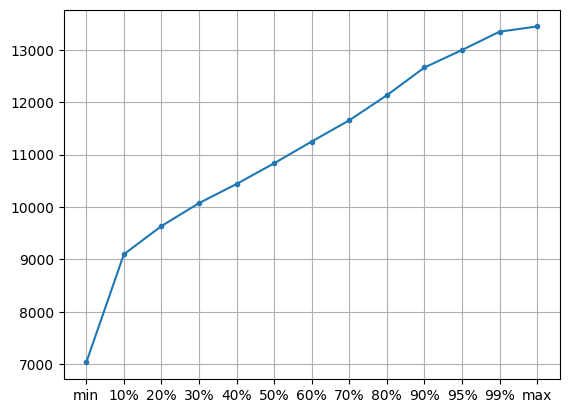

In [26]:
plt.plot(data_flat_filter_stat['load_path'].values[3:],'.-');
ticks = list(data_flat_filter_stat.index.values[3:])
plt.xticks([i for i in range(len(ticks))],ticks)
plt.grid()

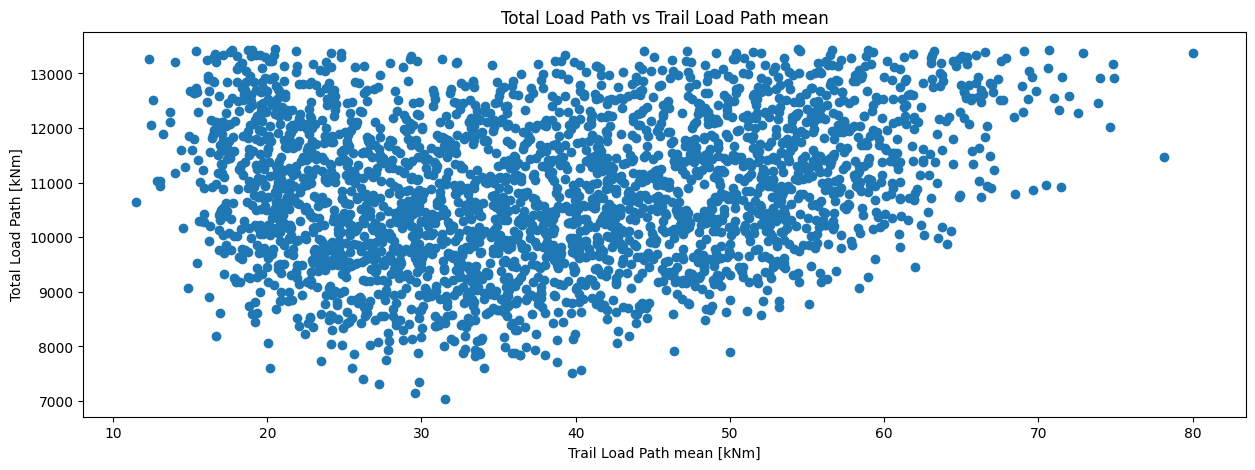

In [27]:
# Plot graph on features correlation

plt.rcParams['figure.figsize'] = [15,5] 
plt.title("Total Load Path vs Trail Load Path mean")
plt.ylabel("Total Load Path [kNm]")
plt.xlabel("Trail Load Path mean [kNm]")

plt.scatter( abs(data_flat_filter['traMag_mean'])*data_flat_filter['traLen_mean'], data_flat_filter['load_path'])
plt.show()

In [28]:
# Import branch-node matrix
branchNode = pd.read_csv(path + "\\CEM\\Data\\240731_data_00_branch-node_CEM.csv", header=None)

branchNode_arr = branchNode.values[:][0]

In [29]:
branchNode

0    1    2    3    4    5    6    7    8    9    ...  250  251  252  253   
0    0    5    1    6    2    9    3   10    4   12  ...    4   11    4    7  \

   254  255  256  257  258  259  
0    8   11   52   57   44   47  

[1 rows x 260 columns]

In [30]:
# Create lists of nodes and edges

# Extract list of labels from DataFrame
data_filter_ind = list(data_filter.index.values[:])

# Initialize list of list of nodes and edges
posXYZ_listlist = []
edgeLen_listlist = []
edgeMag_listlist = []


data_filter_arr = data_filter.values[:]

# Iterate through each row of the array

for i in range(len(data_filter_arr)): 

    # Create arrays of nodes
    p0 = nX
    p1 = p0 + 3*nN
    posXYZ_arr = data_filter_arr[i][p0:p1]

    # Create arrays of trail edges    
    p0 = p1
    p1 = p0 + nT
    traLen_arr = data_filter_arr[i][p0:p1]
    
    p0 = p1
    p1 = p0 + nT
    traMag_arr = data_filter_arr[i][p0:p1]
    
    # Create arrays of deviation edges    
    p0 = p1
    p1 = p0 + nD
    devLen_arr = data_filter_arr[i][p0:p1]
    
    p0 = p1
    p1 = p0 + nD
    devMag_arr = data_filter_arr[i][p0:p1]   
    
    
    posXYZ_listlist.append(posXYZ_arr)
    edgeLen_listlist.append( np.concatenate((traLen_arr, devLen_arr), axis=None) )
    edgeMag_listlist.append( np.concatenate((traMag_arr, devMag_arr), axis=None) )

In [31]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

130


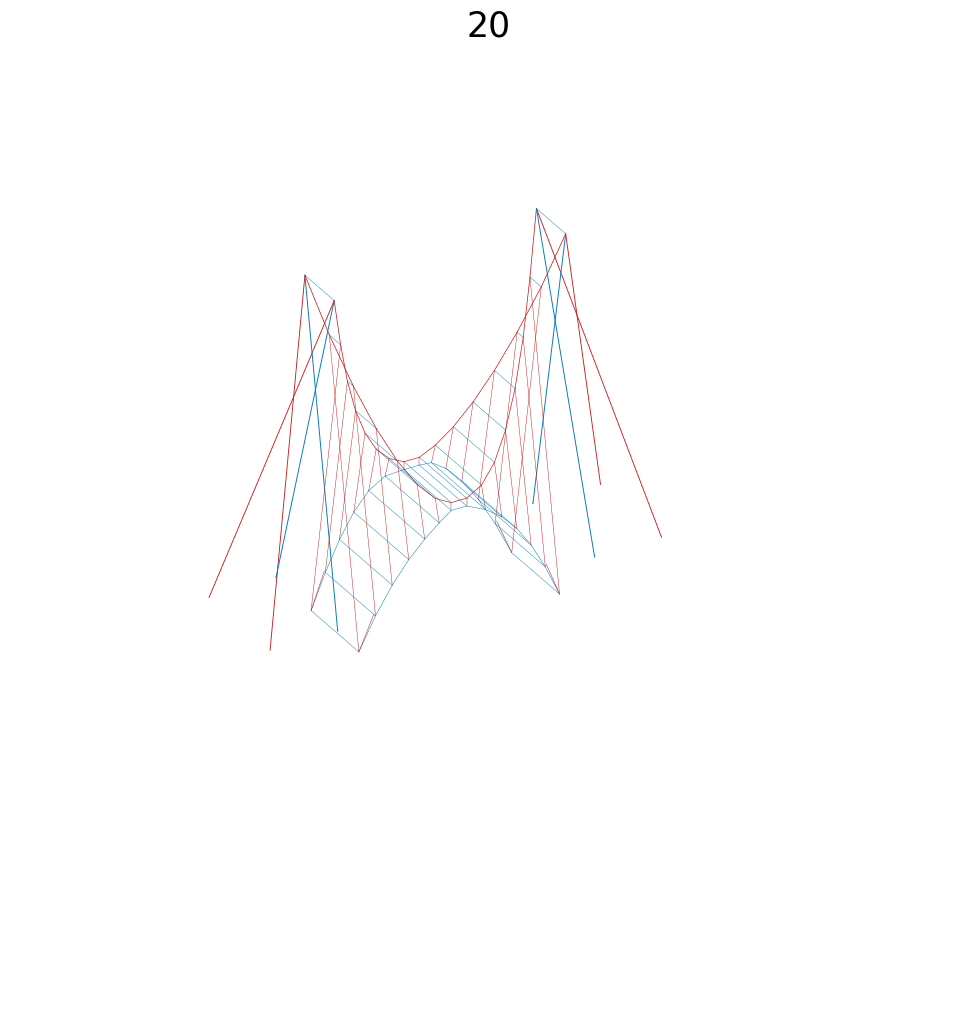

In [32]:
# Plot samples 3D

from mpl_toolkits.mplot3d import Axes3D

f0 = 20    # label of first sample
fN = 1    # number of samples
p0 = data_filter_ind.index(f0)    # get corresponding index of sample in not labelled list

nE = nT + nD

# Define general properties of figure

ncols = 4    # set number of columns for visualization
nrows = math.ceil(fN/ncols)

fig = plt.figure(figsize=(10*ncols,10*nrows), constrained_layout=True)
gs = fig.add_gridspec(nrows, ncols)
gs.update(wspace=0.1, hspace=0.1)    # set the spacing between axes


# Iterate through selected samples

for f in range(p0, p0 + fN):
    
    posXYZ_arr = posXYZ_listlist[f][:]    # nodes coordinates of sample f

    posXYZ_mat = []
    
    # Define array of coordinates
    for i in range(nN):
        x = posXYZ_arr[i]
        y = posXYZ_arr[nN + i]
        z = posXYZ_arr[2*nN + i] 
        posXYZ_mat.append( [x, y, z] )
    coords = np.array(posXYZ_mat)  

    # Set options for subplots
    row = (f-p0) // ncols
    col = (f-p0) % ncols
    ax = fig.add_subplot(gs[row,col], projection='3d')
    ax.set_title(str(data_filter.index[f]), size=25)
    ax.set_aspect('auto')
    ax.axis('off')
    
    # Set view
    ax.set_proj_type('ortho')
    #ax.set_proj_type('persp')
    #ax.view_init(elev=90, azim=-90) # 2D-XY
    #ax.view_init(elev=0, azim=90) # 2D-XZ
    #ax.view_init(elev=0, azim=0) # 2D-YZ
    #ax.view_init(elev=45, azim=45) # 3D-45
    ax.view_init(elev=30, azim=60) # 3D-30
    
    # Create bounding box to simulate equal axes aspect ratio
    bW = 40.0
    ax.plot(0.0, 0.0, 0.0, 'w')
    ax.plot(0.0, 0.0, bW, 'w')
    ax.plot(0.0, bW, 0.0, 'w')
    ax.plot(0.0, bW, bW, 'w')   
    ax.plot(bW, 0.0, 0.0, 'w')
    ax.plot(bW, 0.0, bW, 'w')
    ax.plot(bW, bW, 0.0, 'w')
    ax.plot(bW, bW, bW, 'w')  
   
    # Iterate through edges of sample f
    print(nE)
    for edge_i in range(nE):
        
        edge = [ int(branchNode_arr[2*edge_i]), int(branchNode_arr[2*edge_i+1]) ]
        line_color = (5/256,120/256,190/256) if np.sign(edgeMag_listlist[f][edge_i]) < 0 else (200/256,20/256,20/256)
        line_width = 0.3 + np.abs(edgeMag_listlist[f][edge_i]/40)
             
        ax.plot(coords[edge,0], coords[edge,1], coords[edge,2], color = line_color, linewidth = line_width, antialiased=True, alpha = 1.0)

plt.show()

In [33]:
# Select features for SOM training

SOM_features = [
    'maximum_deck_inclination',
    'load_path',
    'posX_min',
    'posX_max',    
#     'posX_mean', 
#     'posX_std', 
#     'posX_skew', 
#     'posX_kurt', 
    'posY_min',
    'posY_max',    
#     'posY_mean', 
#     'posY_std', 
#     'posY_skew', 
#     'posY_kurt',
#     'posZ_min',
#     'posZ_max',  
#     'posZ_mean',
#     'posZ_std', 
#     'posZ_skew', 
#     'posZ_kurt',
#     'traLen_min',    
#     'traLen_max',    
#     'traLen_mean',
#     'traLen_std', 
#     'traLen_skew', 
#     'traLen_kurt', 
#     'traMag_min',    
#     'traMag_max',    
#     'traMag_mean',
#     'traMag_std', 
#     'traMag_skew', 
#     'traMag_kurt',
#     'devLen_min',    
#     'devLen_max',    
#     'devLen_mean',
#     'devLen_std', 
#     'devLen_skew', 
#     'devLen_kurt', 
#     'devMag_min',    
#     'devMag_max',    
#     'devMag_mean',
#     'devMag_std', 
#     'devMag_skew', 
#     'devMag_kurt'
    ]

# Create matrix of selected features
XX = data_flat_filter[SOM_features].values[:].astype(float)

In [34]:
# Calculate SOM

msz10 = 40    # define number of SOM-nodes in X directions
msz11 = 40    # define number of SOM-nodes in Y directions

som = SOM.SOM('', XX[:], mapsize = [msz10, msz11], norm_method = 'var', initmethod = 'pca')
som.train(n_job = 1, shared_memory = 'no',verbose = 'on')
som.compname=[SOM_features]

initialization method = pca, initializing..
initialization done in 0.009000 seconds

rough training...
radius_ini: 5.000000 , radius_final: 1.250000, trainlen: 17
epoch: 1 ---> elapsed time:  0.036000, quantization error: 1.298856 
epoch: 2 ---> elapsed time:  0.032000, quantization error: 1.261958 
epoch: 3 ---> elapsed time:  0.083000, quantization error: 1.220109 
epoch: 4 ---> elapsed time:  0.044000, quantization error: 1.101199 
epoch: 5 ---> elapsed time:  0.022000, quantization error: 0.971102 
epoch: 6 ---> elapsed time:  0.065000, quantization error: 0.913316 
epoch: 7 ---> elapsed time:  0.038000, quantization error: 0.878162 
epoch: 8 ---> elapsed time:  0.046000, quantization error: 0.848694 
epoch: 9 ---> elapsed time:  0.040000, quantization error: 0.820734 
epoch: 10 ---> elapsed time:  0.043000, quantization error: 0.792751 
epoch: 11 ---> elapsed time:  0.038000, quantization error: 0.764213 
epoch: 12 ---> elapsed time:  0.051000, quantization error: 0.734446 
epoch:

In [35]:
# Get distance/s and Best Matching Unit (BMU)/s indices for each sample

dists, bmus = som.find_K_nodes(som.data_raw, K=1)

[5, 3, 4, 1, 1, 6, 2, 2, 3, 3, 4, 4, 4, 4, 1, 3, 4, 4, 2, 4, 3, 2, 4, 2, 3, 3, 1, 1, 2, 1, 3, 2, 2, 5, 1, 2, 7, 1, 2, 5, 2, 0, 3, 1, 6, 1, 2, 2, 0, 1, 1, 1, 1, 1, 3, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 2, 3, 1, 4, 1, 0, 1, 2, 4, 4, 2, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 3, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 0, 2, 2, 0, 0, 6, 5, 0, 4, 6, 4, 2, 2, 4, 0, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 7, 0, 4, 3, 2, 1, 5, 0, 3, 1, 1, 3, 0, 3, 1, 2, 6, 4, 0, 2, 2, 1, 3, 3, 1, 2, 0, 2, 1, 3, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 3, 2, 3, 2, 3, 5, 2, 2, 5, 1, 3, 0, 1, 2, 1, 3, 3, 0, 1, 3, 2, 1, 0, 3, 0, 2, 0, 1, 1, 2, 2, 3, 3, 2, 4, 2, 2, 1, 5, 2, 0, 4, 1, 2, 3, 6, 0, 0, 0, 2, 2, 2, 1, 1, 0, 3, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 3, 1, 1, 2, 0, 0, 2, 2, 0, 3, 0, 2, 2, 1, 1, 2, 5, 3, 2, 2, 3, 2, 1, 1, 0, 4, 1, 0, 3, 3, 2, 0, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 3, 3, 3, 2, 0, 2, 2, 1, 3, 1, 1, 3, 3, 0, 2, 4, 2, 1, 3, 2, 1, 3, 1, 3, 1, 3, 2, 1, 

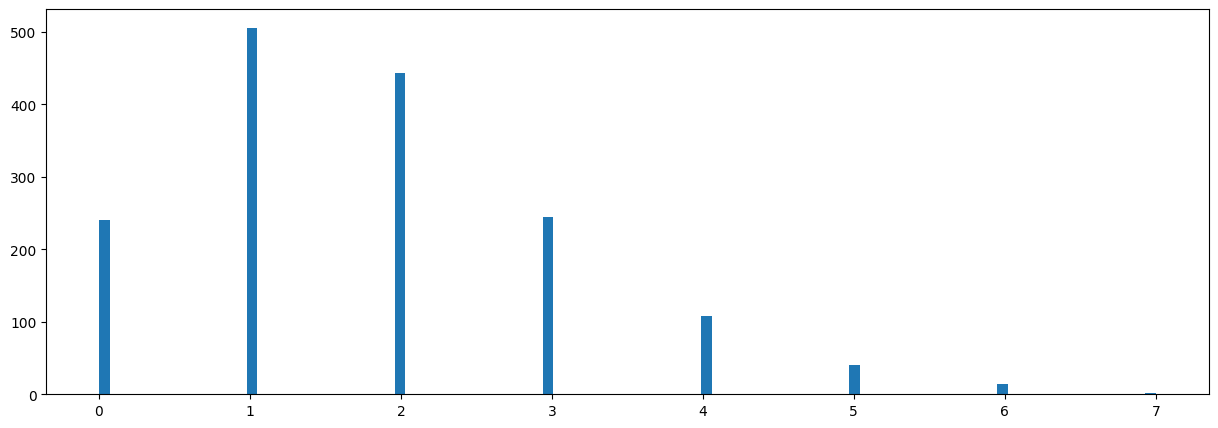

In [36]:
# Calculate number of samples in each SOM-node

n_bmus = [ np.sum(bmus==i) for i in range(som.nnodes) ]

plt.hist(n_bmus,bins=100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

print(n_bmus)

C:\Users\Lazlo\Documents\Repositories\SDML\sompylib\sompy.py:385: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(coord[:, 1], msz[0] - .5 - coord[:, 0], s=area.flatten(), alpha=.9, c=col, marker='o',


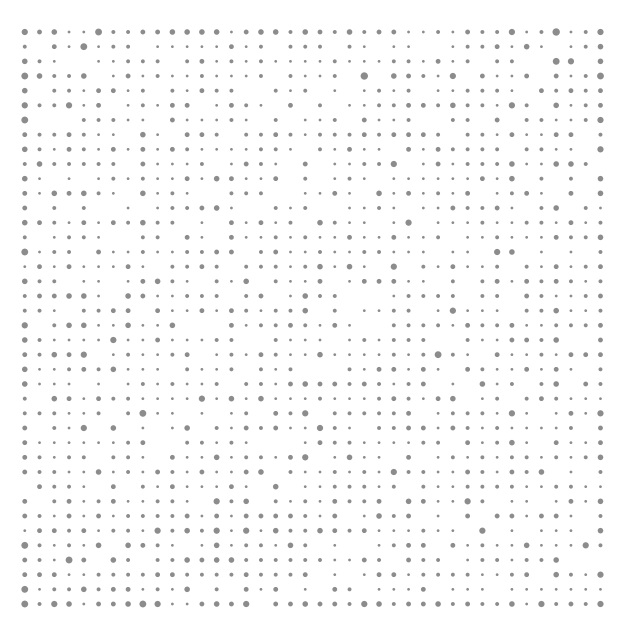

In [37]:
som.hit_map(col='gray')

In [38]:
# Get representative samples per SOM-nodes (samples that are closer to their corresponding BMUs)
sel_samples_SOM = []

for nnode in range(som.nnodes):
    
    # Get all samples per SOM-node
    samples_SOM = np.argwhere(bmus==nnode)[:,0]
    
    # Number of samples per SOM-node
    K = len(samples_SOM)   

    if K >= 1:
        # Sort samples according to distance within each BMU cluster
        DF_tmp = pd.DataFrame()
        DF_tmp['sel_samples_SOM'] = samples_SOM
        DF_tmp['dists'] = dists[samples_SOM]
        DF_tmp = DF_tmp.sort_values(by=['dists'])
        ord_samples_SOM = DF_tmp['sel_samples_SOM'].copy().values[:]     # ordered samples
        sel_sample_SOM = ord_samples_SOM[0]    # representative sample for SOM-node
        sel_samples_SOM.append(sel_sample_SOM)
    else:
        sel_samples_SOM.append(-1)

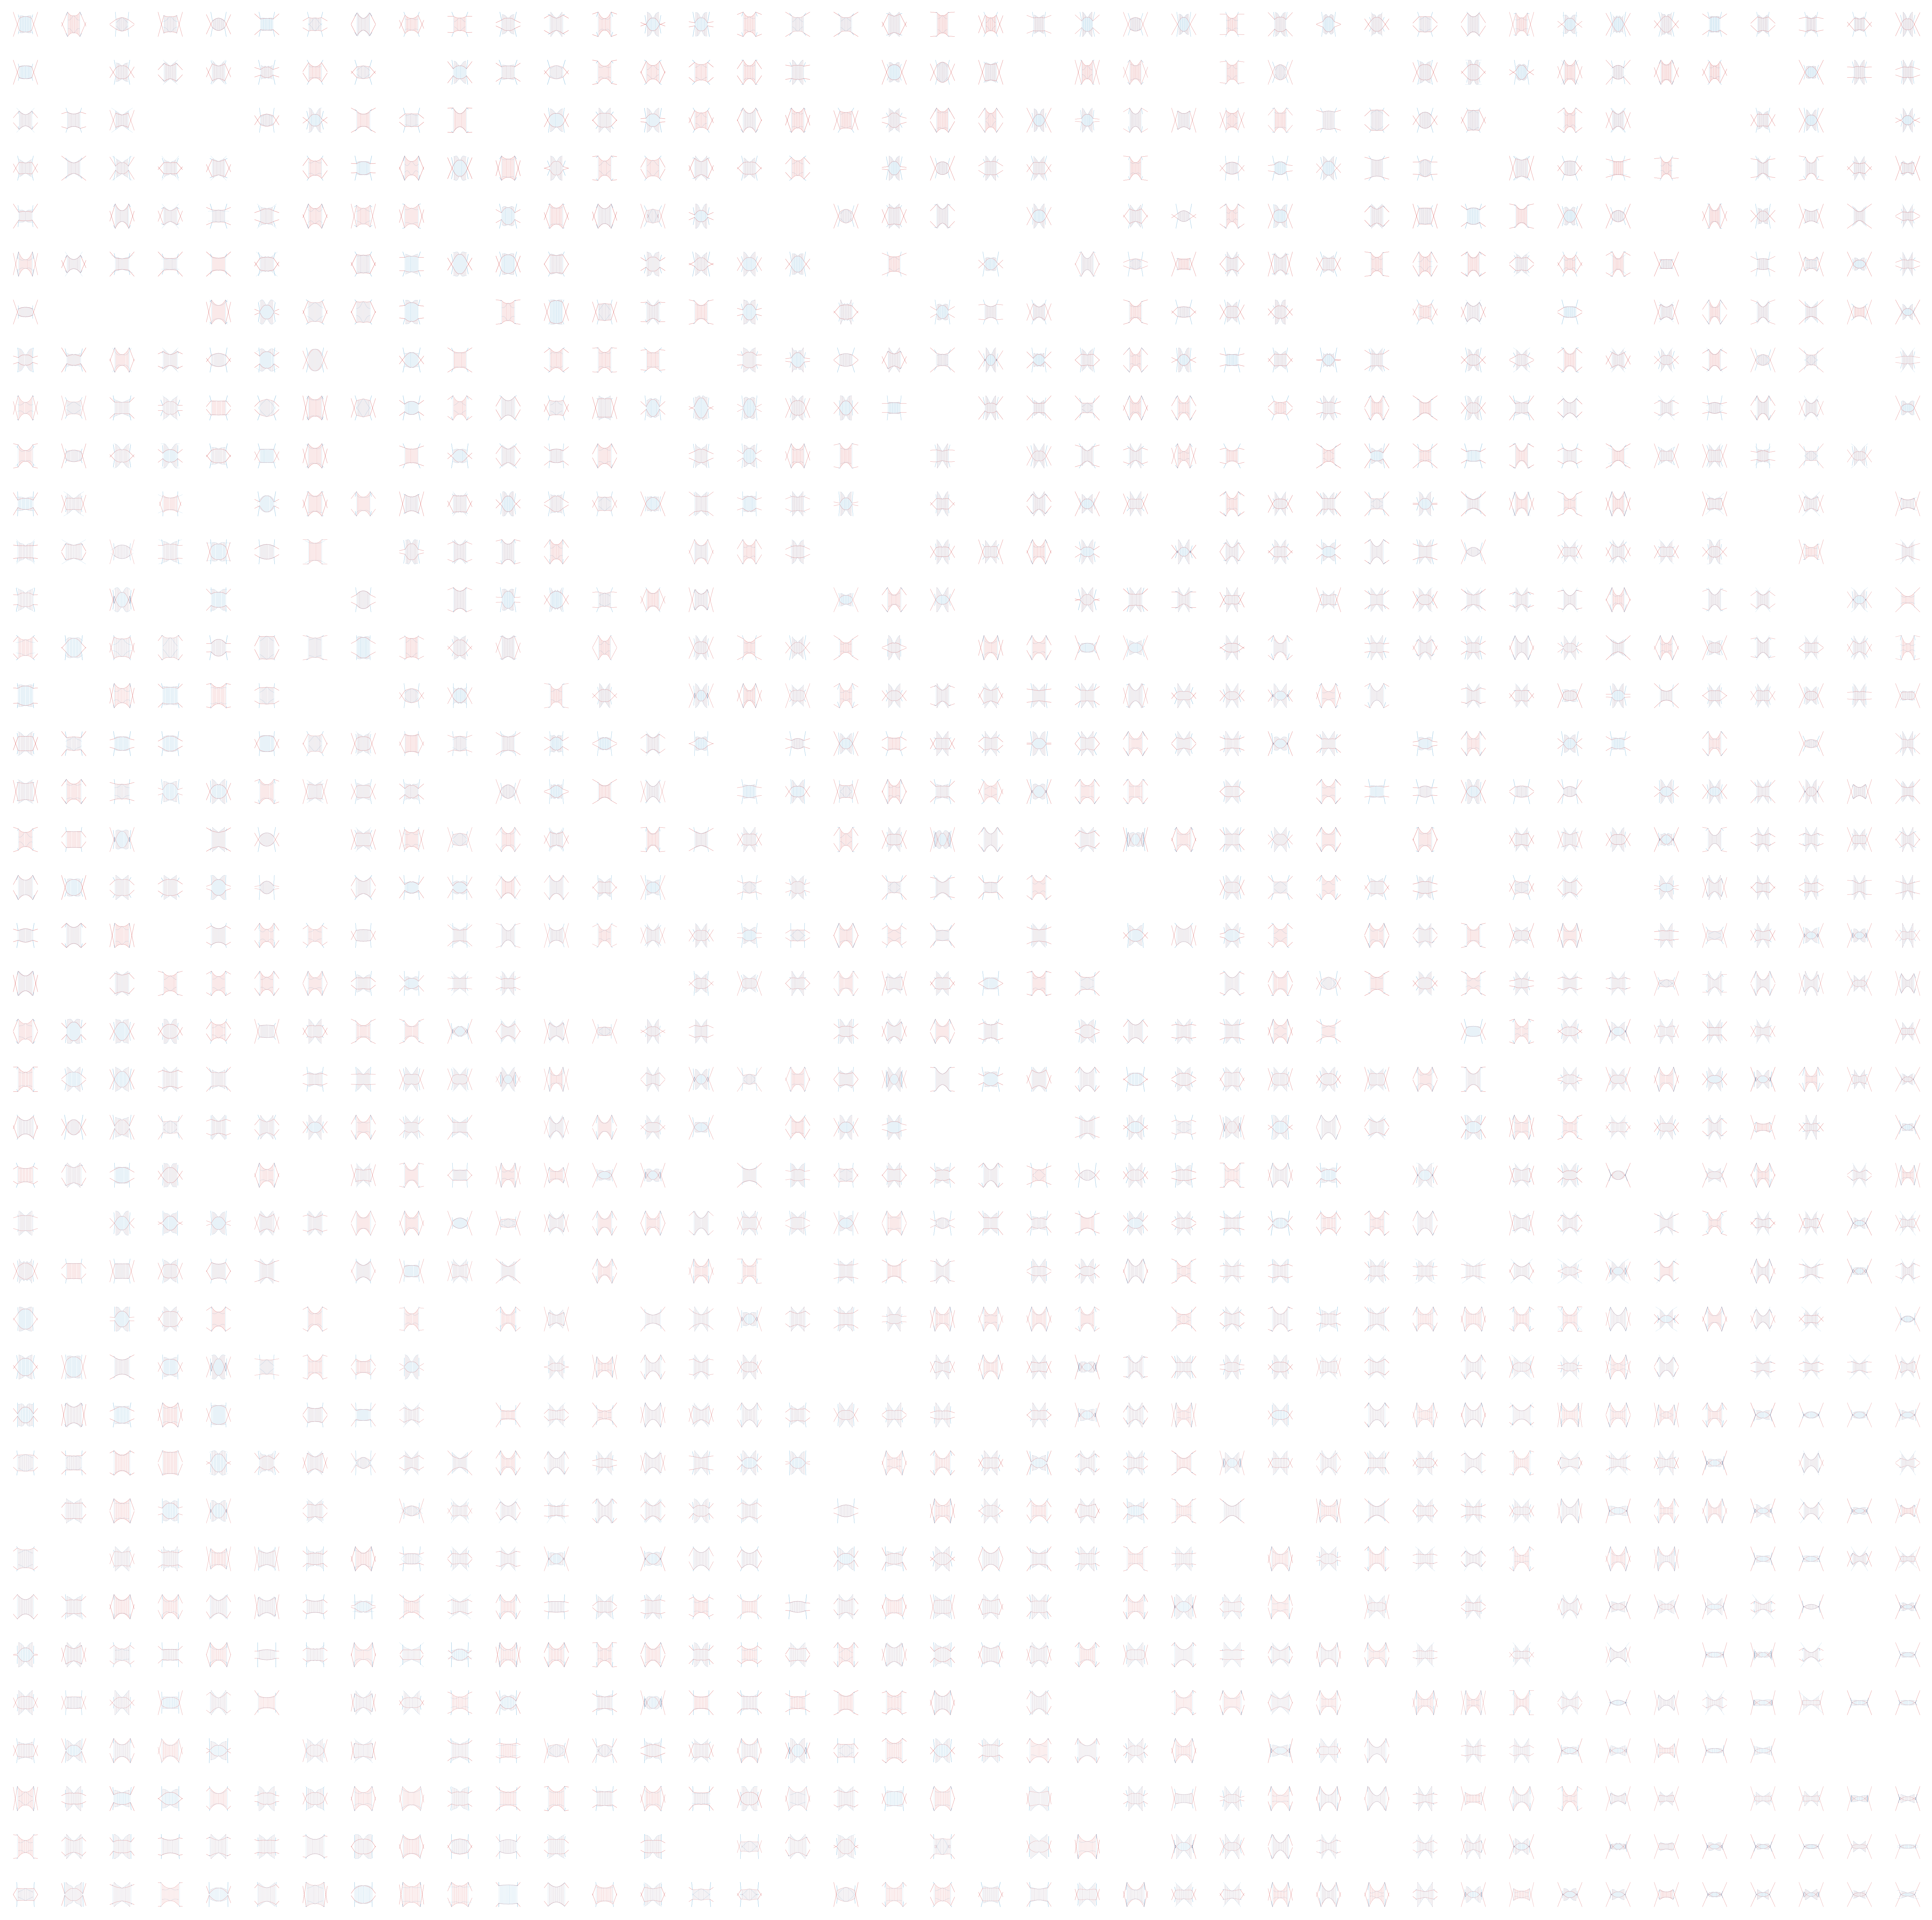

In [39]:
# Plot SOM with representative sample per SOM-node

from mpl_toolkits.mplot3d import Axes3D

nE = nT + nD

# Define general properties of figure

ncols = msz11    # set number of columns for visualization
nrows = msz10    # set number of rows for visualization

fig = plt.figure(figsize=(2*ncols,2*nrows))
gs = fig.add_gridspec(nrows, ncols)
gs.update(wspace=0.1, hspace=0.1)    # set the spacing between axes

    
# Iterate through SOM-nodes to plot representative samples 
for s in range(len(sel_samples_SOM)):

    f = sel_samples_SOM[s]    # representative sample f
    
    if f > -1:              

        posXYZ_arr = posXYZ_listlist[f][:]    # nodes coordinates of sample f
        posXYZ_mat = []

        # Define array of coordinates
        for i in range(nN):
            x = posXYZ_arr[i]
            y = posXYZ_arr[nN + i]
            z = posXYZ_arr[2*nN + i] 
            posXYZ_mat.append( [x, y, z] )
        coords = np.array(posXYZ_mat)  

        # Set options for subplots
        row = s // ncols
        col = s % ncols
        ax = fig.add_subplot(gs[row,col], projection='3d')
#         ax.set_title(str(data_filter.index[f]), size=10)
        ax.set_aspect('auto')
        ax.axis('off')
            
        # Set view
        ax.set_proj_type('ortho')
        #ax.set_proj_type('persp')
        ax.view_init(elev=90, azim=-90) # 2D-XY
        #ax.view_init(elev=0, azim=90) # 2D-XZ
        #ax.view_init(elev=0, azim=0) # 2D-YZ
        #ax.view_init(elev=45, azim=45) # 3D-45
        #ax.view_init(elev=30, azim=60) # 3D-30


        # Iterate through edges of sample f
        for edge_i in range(nE):

            edge = [ int(branchNode_arr[2*edge_i]), int(branchNode_arr[2*edge_i+1]) ]
            line_color = (5/256,120/256,190/256) if np.sign(edgeMag_listlist[f][edge_i]) < 0 else (200/256,20/256,20/256)
            line_width = 0.1 + np.abs(edgeMag_listlist[f][edge_i]/100)

            ax.plot(coords[edge,0], coords[edge,1], coords[edge,2], color = line_color, linewidth = line_width, antialiased=True, alpha = 1.0)                  
       
    else:
        continue
            
plt.show()

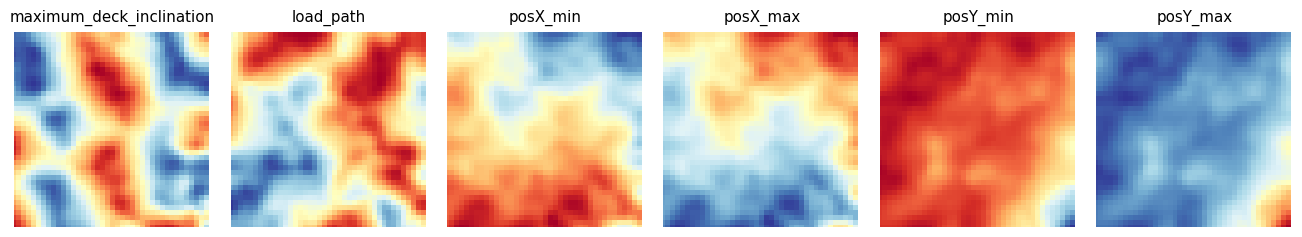

In [48]:
if XX.shape[1] > 100:
    pass
else:
    som.view_map(text_size=9)

In [49]:
# convert BMU index to xy position on SOM

xy_option = som.ind_to_xy(bmus[:,0])
xx = xy_option[:,1]
yy = som.mapsize[0]- xy_option[:,0]

In [50]:
def show_node(node_SOM=0, Measure1='load_path', Measure2='posX_mean'):
    
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from mpl_toolkits.mplot3d import Axes3D
    
    # Print index selected SOM-node
    print ('node index: ', node_SOM)

    # Get all samples in selected SOM-node
    samples_SOM = np.argwhere(bmus==node_SOM)[:,0]
       
    # Number of samples in selected SOM-node
    K = len(samples_SOM) 
    print('number samples: ', K)
   
    if K >= 1:
        
        # Define general properties of figure
        ncols = 4    # set number of columns for visualization
        nrows = math.ceil( K / ncols)    # set number of rows for visualization

        fig = plt.figure(figsize=(10*ncols,10*nrows), constrained_layout=True)
        gs = fig.add_gridspec(nrows, ncols)
        gs.update(wspace=0.1, hspace=0.1)    # set the spacing between axes
        
        # Sort samples in SOM_node according to distance within each BMU cluster
        DF_tmp = pd.DataFrame()
        DF_tmp['sel_samples_SOM'] = samples_SOM
        DF_tmp['dists'] = dists[samples_SOM]
        DF_tmp = DF_tmp.sort_values(by=['dists'])
        ord_samples_SOM = DF_tmp['sel_samples_SOM'].copy().values[:]     # ordered samples in selected SOM-node
                         
        # Iterate through ordered samples of selected SOM-node 
        for s in range(len(ord_samples_SOM)):

            f = ord_samples_SOM[s]
            
            posXYZ_arr = posXYZ_listlist[f][:]    # nodes coordinates of sample f

            posXYZ_mat = []

            # Define array of coordinates
            for i in range(nN):
                x = posXYZ_arr[i]
                y = posXYZ_arr[nN + i]
                z = posXYZ_arr[2*nN + i] 
                posXYZ_mat.append( [x, y, z] )
            coords = np.array(posXYZ_mat)  

            # Set options for subplots
            row = s // ncols
            col = s % ncols
            ax = fig.add_subplot(gs[row,col], projection='3d')
            title_ind = data_filter.index[f]
            title_feat_1 = truncate(data_flat_filter[Measure1].iloc[f], 2)
            title_feat_2 = truncate(data_flat_filter[Measure2].iloc[f], 2)
            ax.set_title(str(title_ind) + "  " + str(title_feat_1) + "  " + str(title_feat_2), size=25)
            ax.set_aspect('auto')
            ax.axis('off')

            # Set view
            ax.set_proj_type('ortho')
            #ax.set_proj_type('persp')
            #ax.view_init(elev=90, azim=-90) # 2D-XY
            ax.view_init(elev=0, azim=90) # 2D-XZ
            #ax.view_init(elev=0, azim=0) # 2D-YZ
            #ax.view_init(elev=45, azim=45) # 3D-45
            #ax.view_init(elev=30, azim=60) # 3D-30

            # Create bounding box to simulate equal axes aspect ratio
            bW = 40.0
            ax.plot(0.0, 0.0, 0.0, 'w')
            ax.plot(0.0, 0.0, bW, 'w')
            ax.plot(0.0, bW, 0.0, 'w')
            ax.plot(0.0, bW, bW, 'w')   
            ax.plot(bW, 0.0, 0.0, 'w')
            ax.plot(bW, 0.0, bW, 'w')
            ax.plot(bW, bW, 0.0, 'w')
            ax.plot(bW, bW, bW, 'w')  

            # Iterate through edges of sample f
            for edge_i in range(nE):

                edge = [ int(branchNode_arr[2*edge_i]), int(branchNode_arr[2*edge_i+1]) ]
                line_color = (5/256,120/256,190/256) if np.sign(edgeMag_listlist[f][edge_i]) < 0 else (200/256,20/256,20/256)
                line_width = 0.3 + np.abs(edgeMag_listlist[f][edge_i]/40)

                ax.plot(coords[edge,0], coords[edge,1], coords[edge,2], color = line_color, linewidth = line_width, antialiased=True, alpha = 1.0)
    else:
        print ('not enough data for this node')

node index:  0
number samples:  5


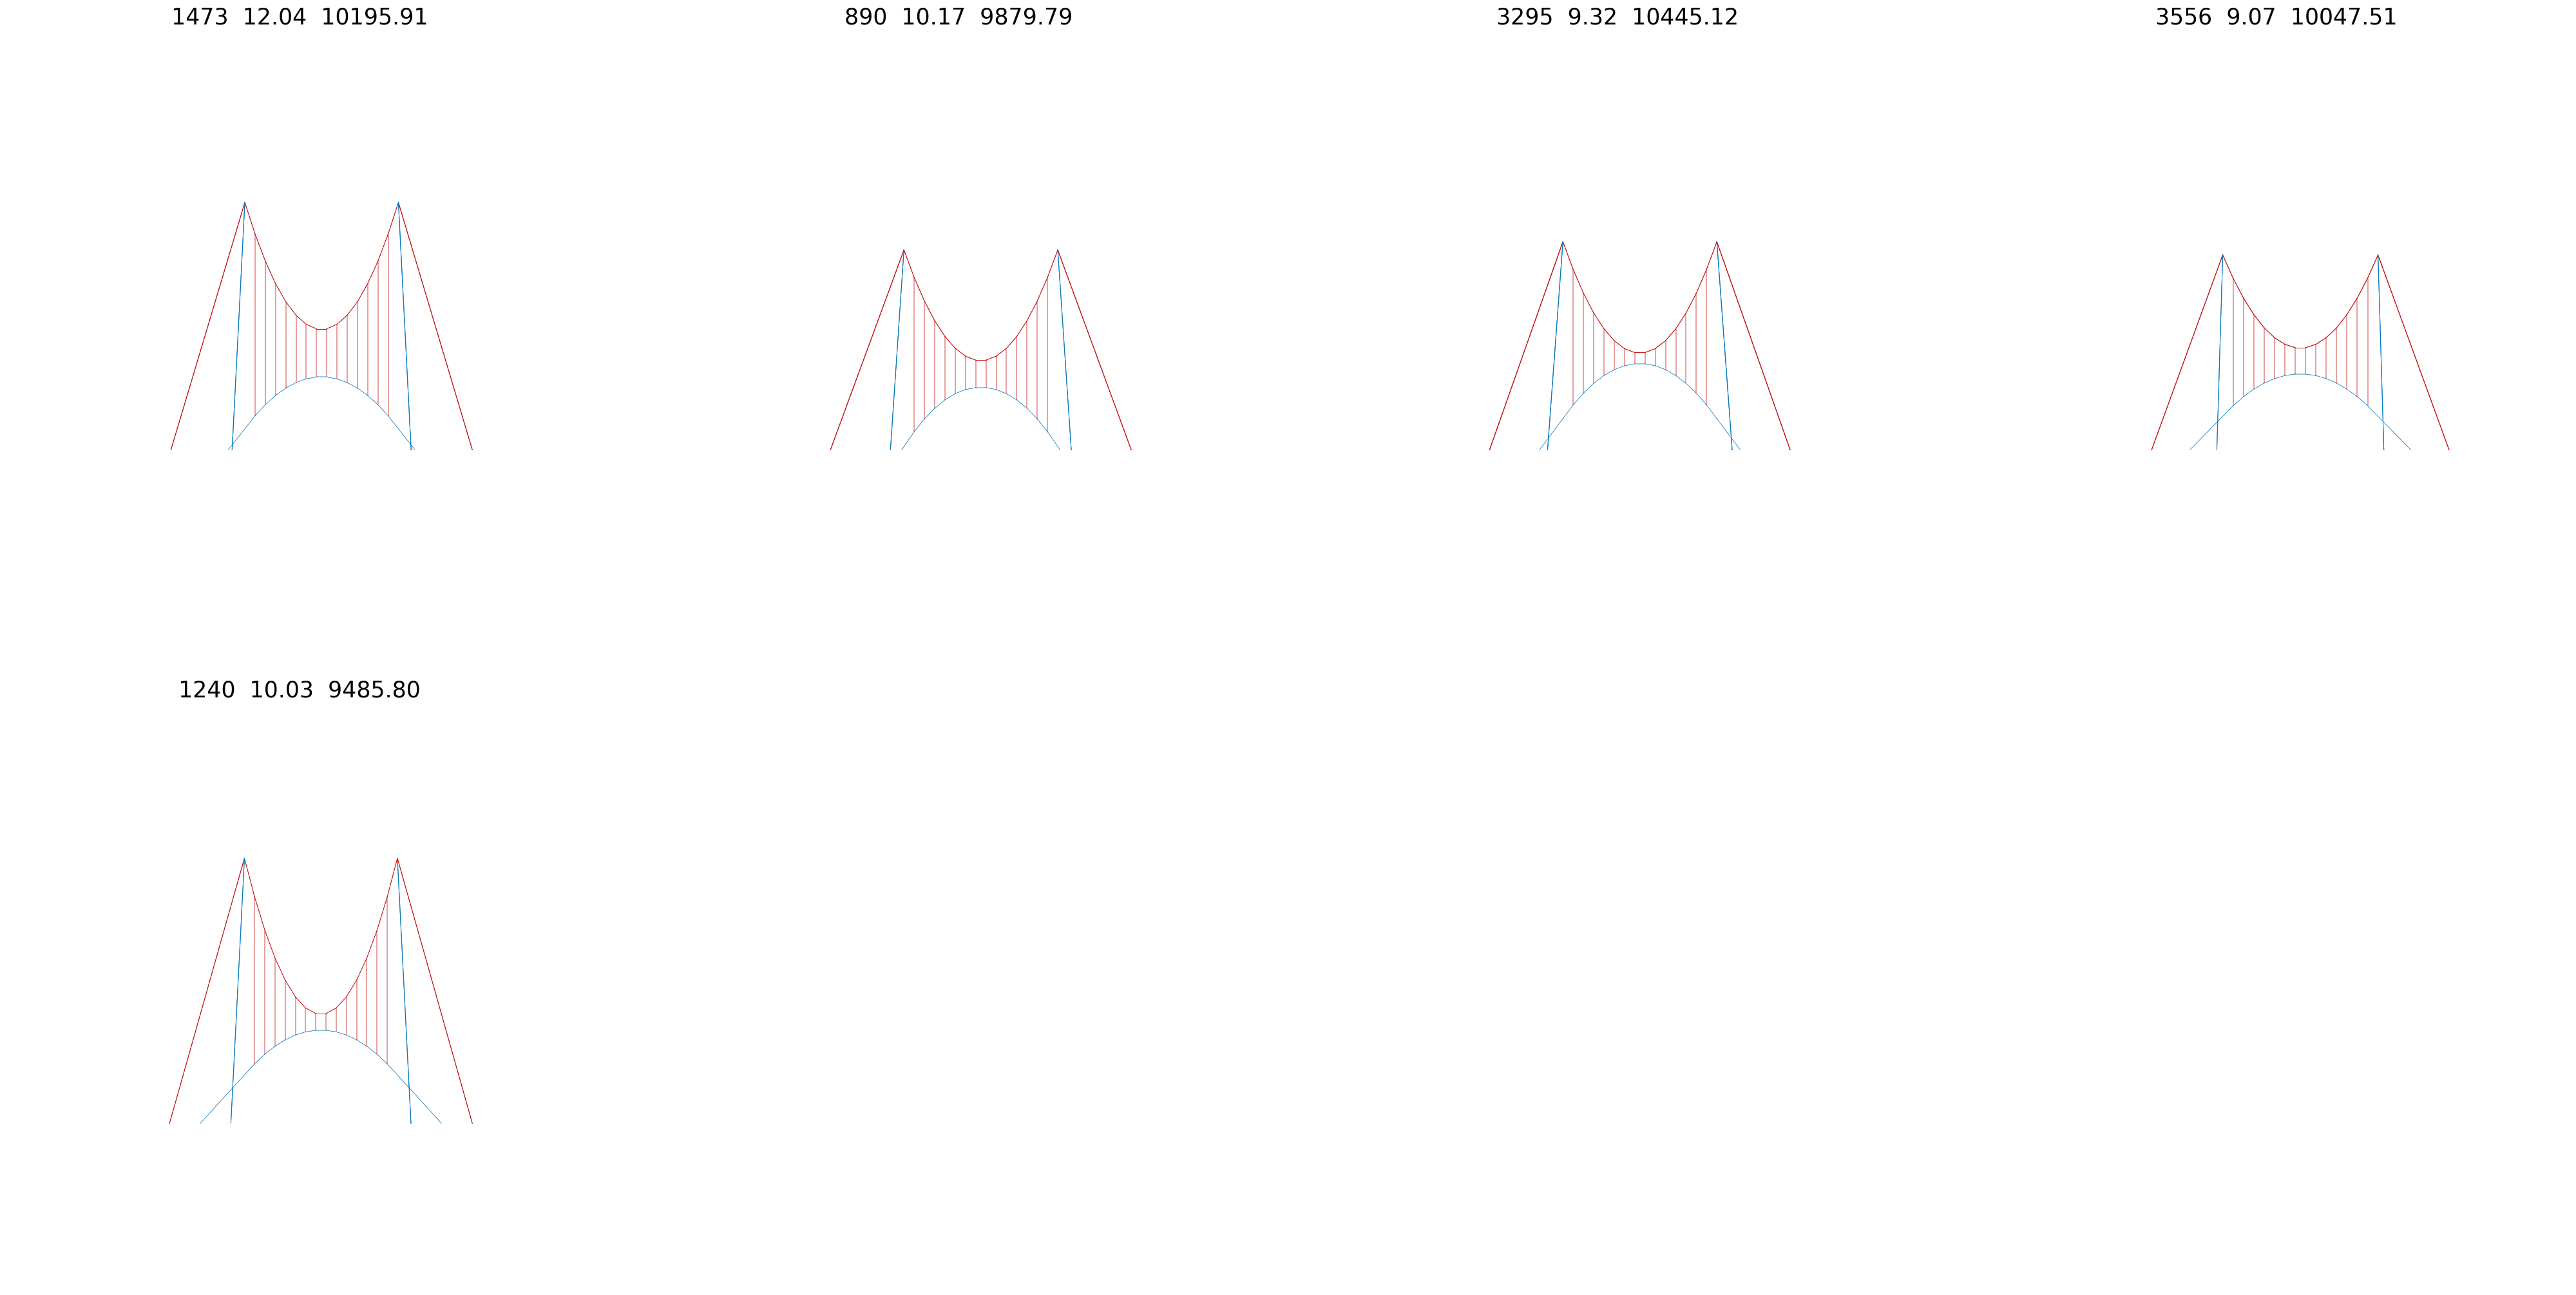

In [51]:
show_node(node_SOM = 0, Measure1='devLen_mean', Measure2='load_path')

node index:  39
number samples:  5


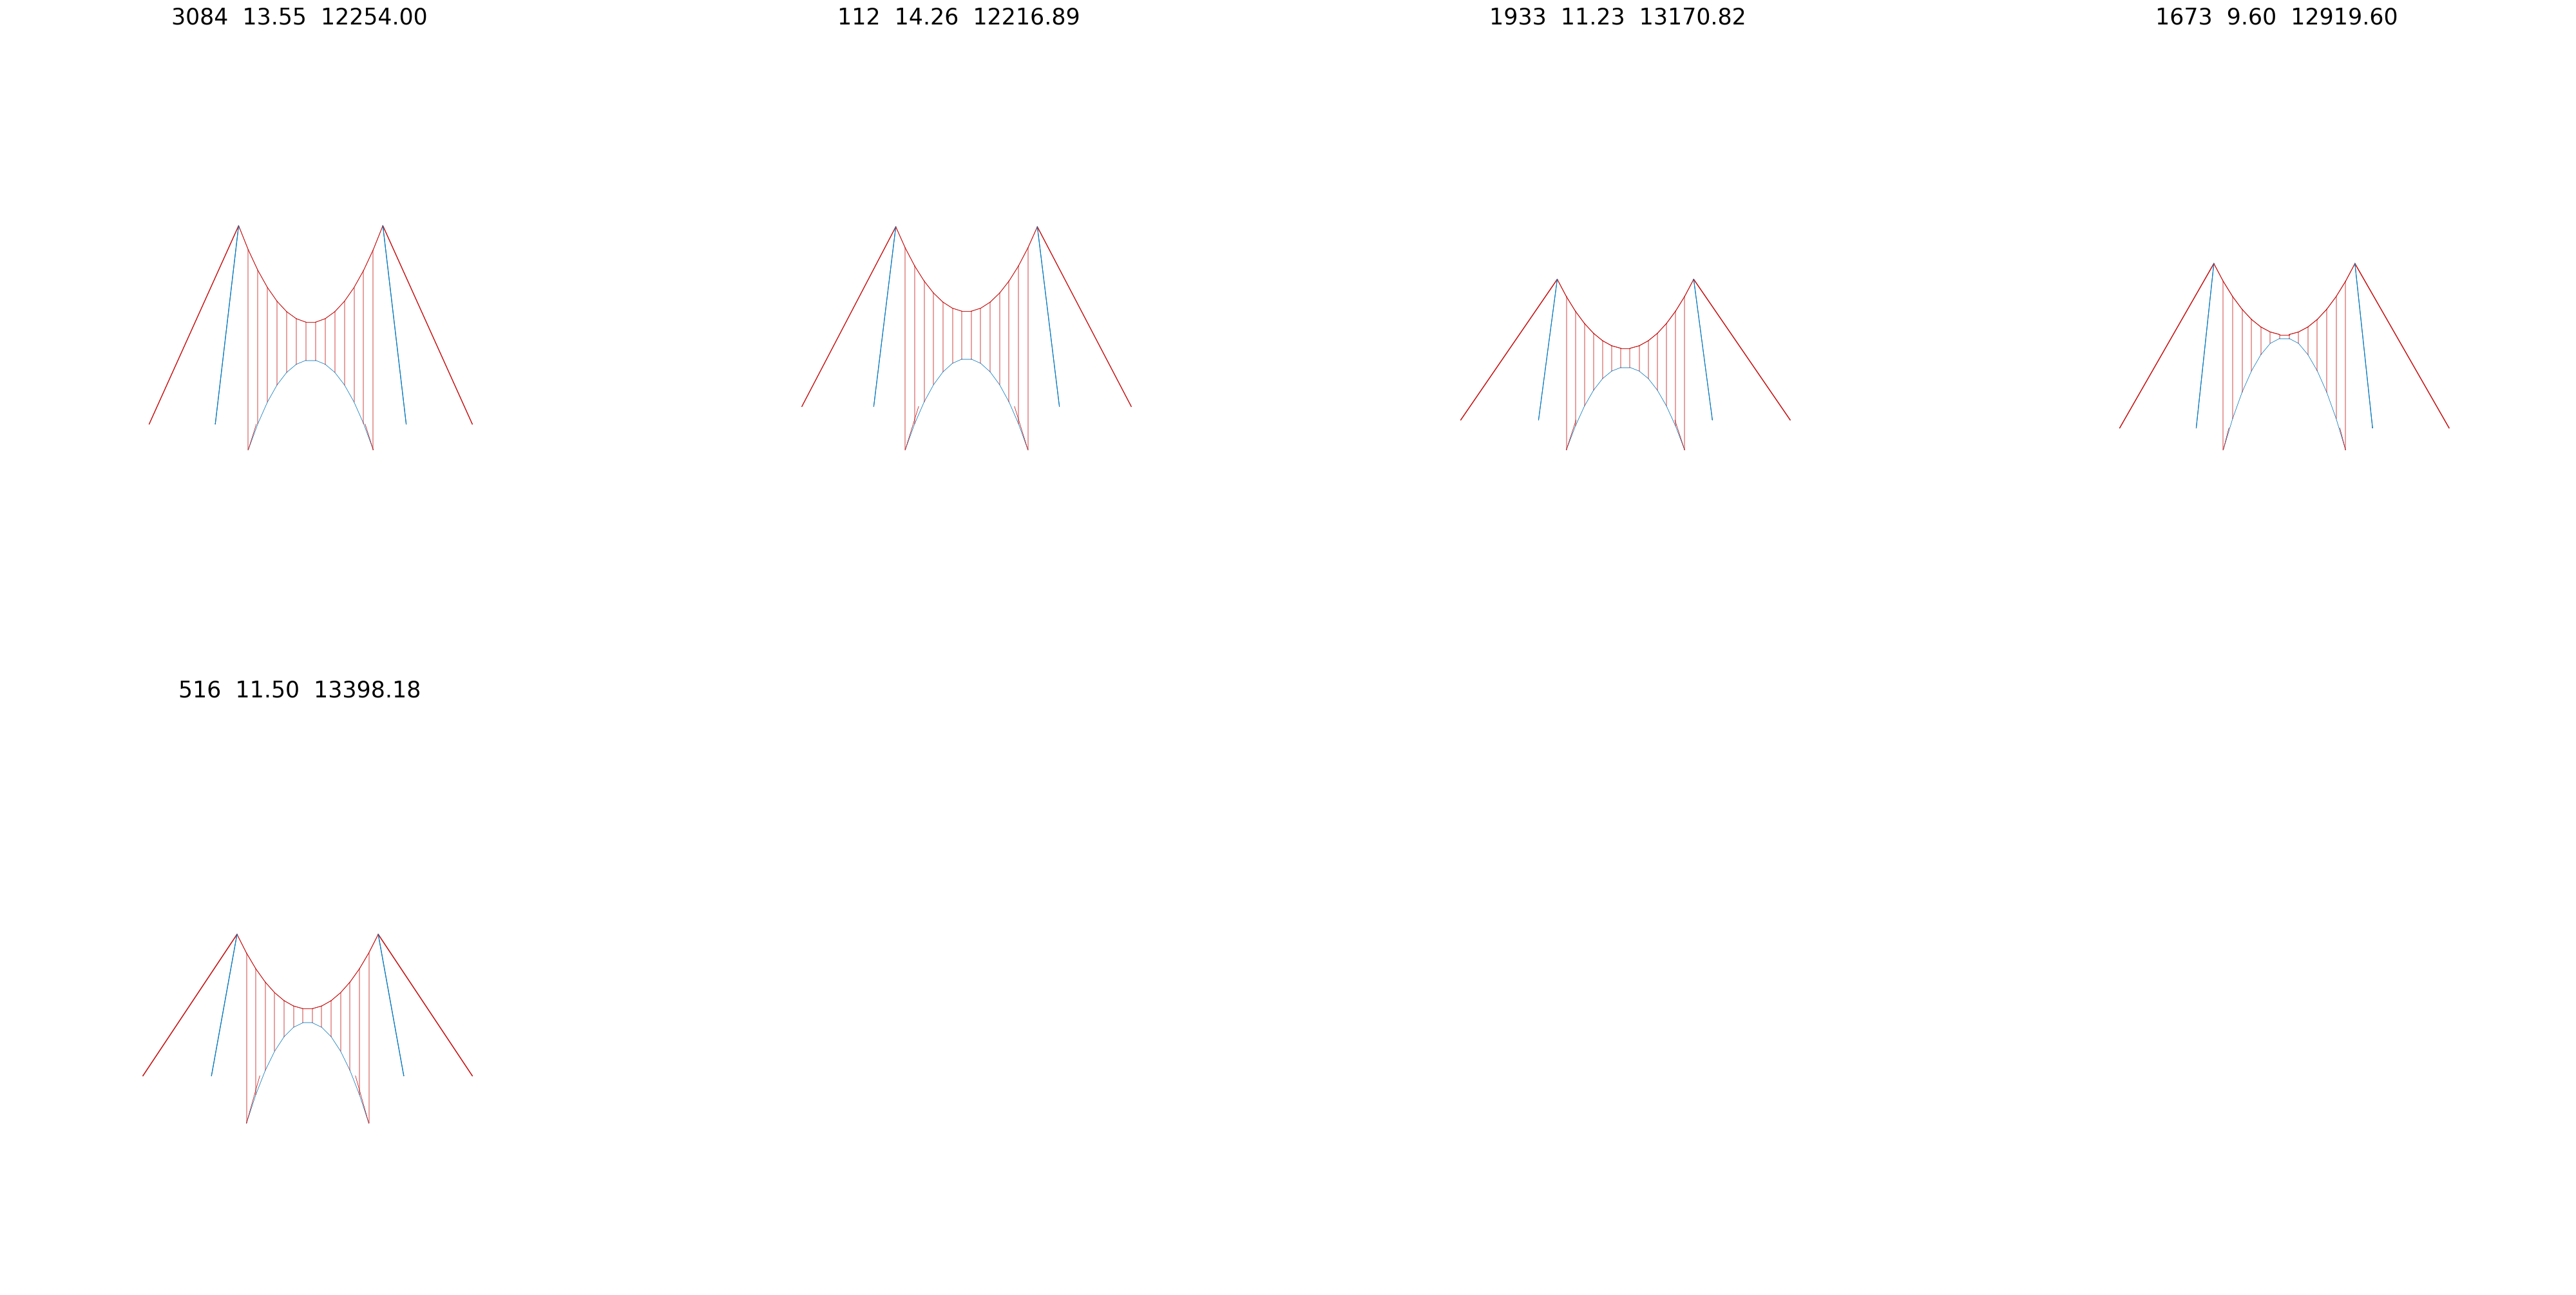

In [52]:
show_node(node_SOM=39, Measure1='devLen_mean', Measure2='load_path')

In [53]:
codebooks = SOM.denormalize_by(som.data_raw, som.codebook)
unq_bmus = np.unique(bmus)
xy_som = som.ind_to_xy(unq_bmus)


def query_nodes_new(Measure1=None, percentRange1=[0,50], Measure2=None, percentRange2=[0,50],
                    Measure3=None, percentRange3=[0,50], plot='Yes'):
    
    from IPython.display import clear_output, Image, display
  
    codebooks = SOM.denormalize_by(som.data_raw,som.codebook)

    DF_som = pd.DataFrame(data=codebooks,columns=list(som.compname[0]))
    percentiles = list(set(percentRange1).union(percentRange2).union(percentRange3))
    percentiles = list(np.sort(percentiles)/100.0)
    som_stat = DF_som.describe(percentiles=percentiles)

    ind_sel_nodes = []
    
    if Measure1 != None and  Measure2 != None and  Measure3 != None:
        ind_sel_nodes = DF_som.loc[
            (DF_som[Measure1] >= som_stat.loc[str(percentRange1[0])+'%'][Measure1])
            &
            (DF_som[Measure1] <= som_stat.loc[str(percentRange1[1])+'%'][Measure1])
            &
            (DF_som[Measure2] >= som_stat.loc[str(percentRange2[0])+'%'][Measure2])
            &
            (DF_som[Measure2] <= som_stat.loc[str(percentRange2[1])+'%'][Measure2])
            &
            (DF_som[Measure3] >= som_stat.loc[str(percentRange3[0])+'%'][Measure3])
            &
            (DF_som[Measure3] <= som_stat.loc[str(percentRange3[1])+'%'][Measure3])
        ].index.values[:]

    if Measure1 != None and Measure2 != None and Measure3 == None:
        ind_sel_nodes = DF_som.loc[
            (DF_som[Measure1] >= som_stat.loc[str(percentRange1[0])+'%'][Measure1])
            &
            (DF_som[Measure1] <= som_stat.loc[str(percentRange1[1])+'%'][Measure1])
            &
            (DF_som[Measure2] >= som_stat.loc[str(percentRange2[0])+'%'][Measure2])
            &
            (DF_som[Measure2] <= som_stat.loc[str(percentRange2[1])+'%'][Measure2])
        ].index.values[:]
    
    if Measure1 != None and  Measure2 == None and Measure3 == None:
        ind_sel_nodes = DF_som.loc[
            (DF_som[Measure1] >= som_stat.loc[str(percentRange1[0])+'%'][Measure1])
            &
            (DF_som[Measure1] <= som_stat.loc[str(percentRange1[1])+'%'][Measure1])
        ].index.values[:] 
    
    if plot=='Yes':
        xy_sel = som.ind_to_xy(ind_sel_nodes)            
        fig = plt.figure(figsize=(20,40))
        plt.rcParams.update({'font.size': 10})

        for i in range(codebooks.shape[1]):

            ax = fig.add_subplot(6,3,i+1)
            col = codebooks[unq_bmus,i]
            mn = col.min()
            mx = col.max()
            col = codebooks[ind_sel_nodes,i]
            x = xy_sel[:,1]*2
            y = som.mapsize[0]-1-xy_sel[:,0]*1
            sc = ax.scatter(x,y,s=200,c=col,cmap=plt.cm.RdYlBu_r,edgecolor='None',vmax=mx,vmin=mn,marker='o',alpha=1.);
            eps = 1
            plt.xlim(x.min()-eps,x.max()+eps)
            plt.ylim(y.min()-eps,y.max()+eps)
            plt.colorbar(sc,shrink=.5,ticks=[mn,(mn+mx)/2.0,mx])
            plt.title(som.compname[0][i])
            plt.tight_layout(pad=0.001, h_pad=0.0, w_pad=0.0)
            plt.xlim(0,som.mapsize[0]-1);
            plt.ylim(0,som.mapsize[1]-1);
            plt.xticks([]);
            plt.yticks([]);
    
    return ind_sel_nodes

In [54]:
# Design Option A

sel_options_A = query_nodes_new(Measure1='posX_min',percentRange1=[0,40], Measure2='maximum_deck_inclination',percentRange2=[0,30],
                                Measure3='load_path',percentRange3=[0,30], plot='No')
print("Selected nodes: " + str(len(sel_options_A)) + "/" + str(msz10*msz11))
print("")
print(sel_options_A)

Selected nodes: 25/1600

[ 438  439  478  479  518  519  570  608  609  610  611  612  649  650
  651  652  690  691  692  730  731  732  771  811 1159]


node index:  439
number samples:  4


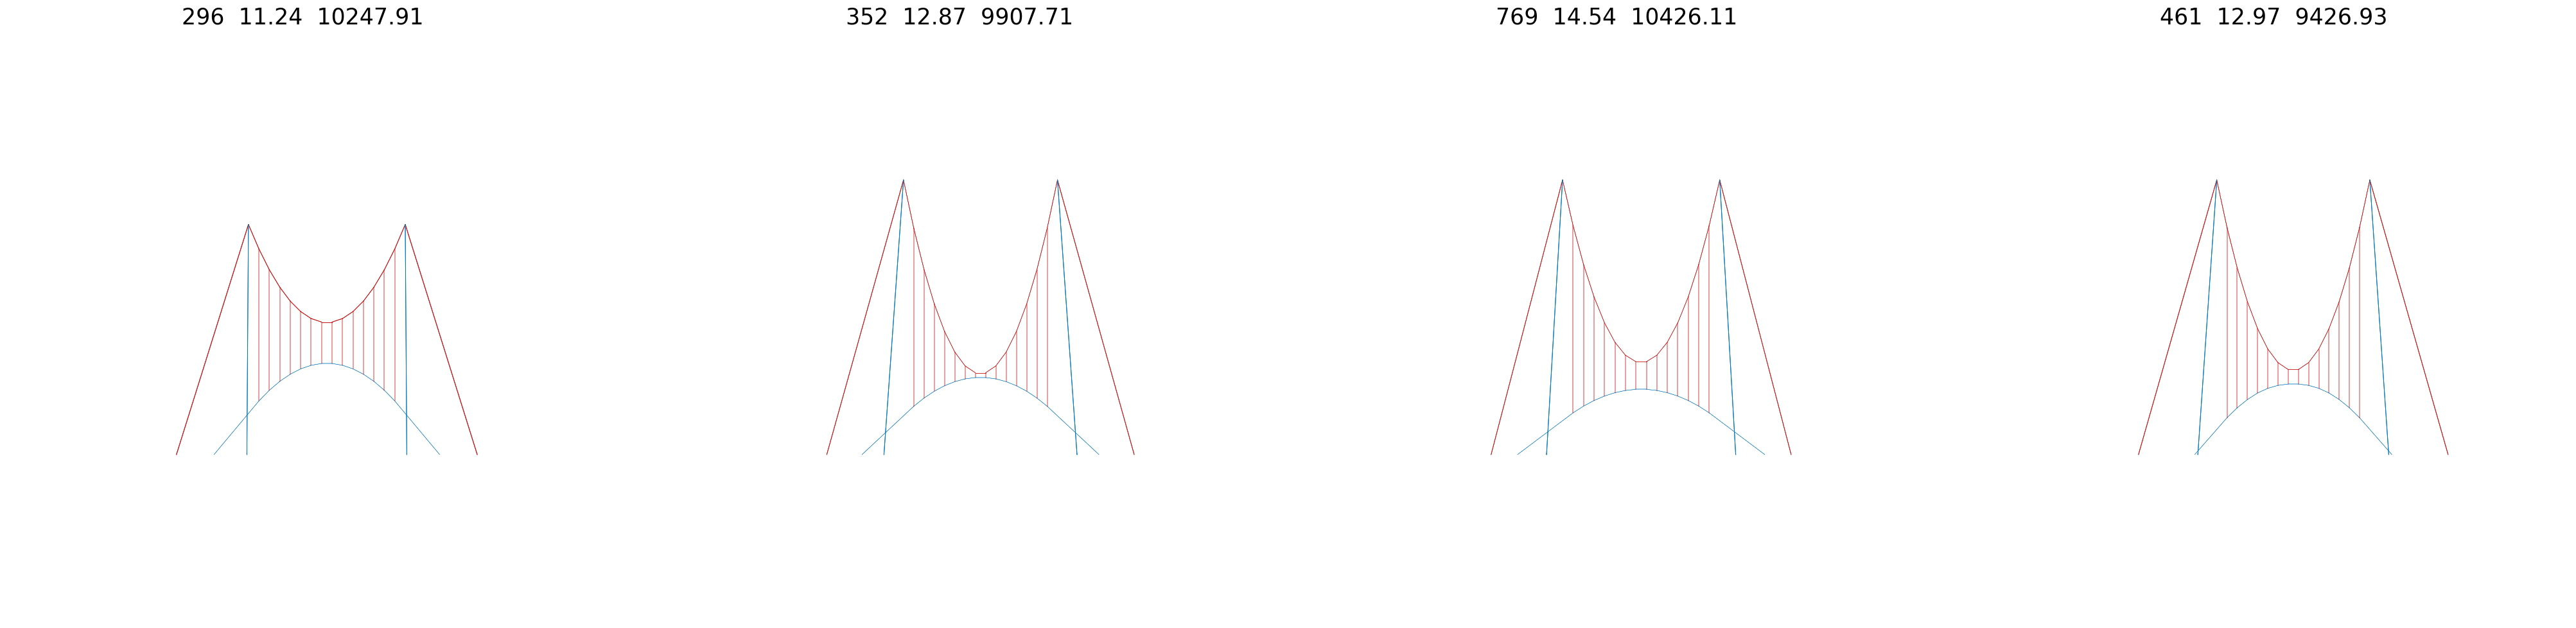

In [57]:
show_node(node_SOM=439, Measure1='devLen_mean', Measure2='load_path')

In [71]:
# Split DataFrame in train and test with Numpy and Scikit-learn

from sklearn.model_selection import train_test_split

X = input_data_filter.values # set input
Y = data_flat_filter[['load_path']].values # set output

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)

print("Number elements in train set: "+str(len(Y_train)))
print("Number elements in test set: "+str(len(Y_test)))

Number elements in train set: 2573
Number elements in test set: 286


In [72]:
# Standardize X with Numpy and Scikit-learn

from sklearn.preprocessing import StandardScaler

ss = StandardScaler() 
ss.fit(X_train)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

ss.fit(Y_train)
Y_train = ss.fit_transform(Y_train).ravel()
Y_test = ss.transform(Y_test).ravel()

In [95]:
# Multi-layer Perceptron Regressor

from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(activation='relu', solver='adam', alpha=1e-6, hidden_layer_sizes=(10,15,10), max_iter=3000, random_state=0, verbose=False)

mlpr.fit(X_train, Y_train)

# y_pred_train = mlpr.predict(X_train)
# y_pred = mlpr.predict(X_test)

score_train = mlpr.score(X_train, Y_train)
score_test = mlpr.score(X_test, Y_test)
    
print("SCORE R2: TRAIN=%.4f TEST=%.4f" % (score_train,score_test))

SCORE R2: TRAIN=0.3960 TEST=0.2533
